# Preprocessing RoadTrafficAccidents

This file is for preprocessing the RoadTrafficAccidentsLocations file from https://data.stadt-zuerich.ch/dataset/sid_dav_strassenverkehrsunfallorte. 

In [1]:
import pandas as pd
import os
import datetime
import math
import numpy as np

Getting the full path to the dataset folder

In [2]:
dir_path = os.path.dirname(os.path.realpath("__file__"))
path_to_datasets_folder = os.path.join(dir_path, "datasets")
path_to_accidents_file = os.path.join(path_to_datasets_folder, "RoadTrafficAccidentLocations.csv")

Reading the TrafficAccident file and remove all language duplicates

In [3]:
df_accidents = pd.read_csv(path_to_accidents_file)
df_accidents = df_accidents.drop(columns=['AccidentType_de', 'AccidentType_fr', 'AccidentType_it'])
df_accidents = df_accidents.drop(columns=['AccidentSeverityCategory_de', 'AccidentSeverityCategory_fr', 'AccidentSeverityCategory_it'])
df_accidents = df_accidents.drop(columns=['RoadType_de', 'RoadType_fr', 'RoadType_it'])
df_accidents = df_accidents.drop(columns=['AccidentMonth_de', 'AccidentMonth_fr','AccidentMonth_it'])
df_accidents = df_accidents.drop(columns=['AccidentWeekDay_de', 'AccidentWeekDay_fr', 'AccidentWeekDay_it'])
df_accidents.head()

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,...,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,A2D2677533867004E0430A865E337004,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,...,1245194,ZH,261,2011,1,January,aw406,Saturday,0.0,00h-01h
1,9FD6441F802C20A6E0430A865E3320A6,at0,Accident with skidding or self-accident,as3,Accident with light injuries,False,True,False,rt433,Minor road,...,1246980,ZH,261,2011,1,January,aw406,Saturday,1.0,01h-02h
2,9FDA0DC4856A6094E0430A865E336094,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt439,Other,...,1247749,ZH,261,2011,1,January,aw406,Saturday,2.0,02h-03h
3,A3B66E42396E6000E0430A865E336000,at5,Accident when crossing the lane(s),as3,Accident with light injuries,False,False,False,rt433,Minor road,...,1247102,ZH,261,2011,1,January,aw406,Saturday,2.0,02h-03h
4,9FDA0DBE8CCE9096E0430A865E339096,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,...,1250690,ZH,261,2011,1,January,aw406,Saturday,3.0,03h-04h


Create the correct datetime for each row and add 'nan' as value in the date row if the accident hour is missing (rows cases)

In [4]:
df_accidents.head().shape #dims of cleaned dataset

(5, 21)

In [5]:
from collections import Counter

#count NaNs in dataset:
for i in df_accidents.columns:
    print(Counter(list(df_accidents[i].isna()))[1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
0


In [6]:
#Checking positions of NaNs in dataset and get corresponding columns:
idx, idy = np.where(pd.isnull(df_accidents))
idx, df_accidents.columns[idy]

(array([3149, 5749, 7436, 8193], dtype=int64),
 Index(['AccidentHour', 'AccidentHour', 'AccidentHour', 'AccidentHour'], dtype='object'))

In [7]:
#drop obs from 2020 since weather dataset only contains missing values for this year
df_accidents = df_accidents[df_accidents['AccidentYear'] != 2020]

In [8]:
df_accidents.loc[3148:3150,:]

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,...,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour,AccidentHour_text
3148,B77FF2BD0BF30056E0430A8394270056,at2,Accident with rear-end collision,as4,Accident with property damage,False,False,False,rt433,Minor road,...,1247949,ZH,261,2011,11,November,aw401,Monday,21.0,21h-22h
3149,B74241C848E101A8E0430A83942701A8,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt430,Motorway,...,1246482,ZH,261,2011,11,November,aw401,Monday,NaN,?h
3150,B77FF2BD0FF80056E0430A8394270056,at4,Accident when turning-into main road,as4,Accident with property damage,False,False,False,rt433,Minor road,...,1246498,ZH,261,2011,11,November,aw402,Tuesday,7.0,07h-08h


Count days in every year's month... This is needed to check whether we have data for every day of each year in order to pin down the exact date:


In [9]:
idx, idy = np.where(pd.isnull(df_accidents))
idx, df_accidents.columns[idy]

(array([3149, 5749, 7436, 8193], dtype=int64),
 Index(['AccidentHour', 'AccidentHour', 'AccidentHour', 'AccidentHour'], dtype='object'))

In [10]:
from itertools import groupby
import calendar

years = np.arange(2011,2020,1).tolist()
months = np.arange(1,13,1).tolist()


#count number of distinct days in each month for every year:
for j in years:
    
    days_per_month = []
    
    for i in months:
        z = pd.Series(zip([[len([v]), k] for k, v in groupby(df_accidents[(df_accidents['AccidentYear'] == j) & (df_accidents['AccidentMonth'] == i)]['AccidentWeekDay'])]))
        item_counts = z.index.value_counts(normalize=False)
        days_per_month.append(item_counts.sum())
        
    print('{}:'.format(j), days_per_month)

2011: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2012: [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2013: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2014: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2015: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2016: [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2017: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2018: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2019: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


In [11]:
#counting entries in every year's months:

for j in years:
    
    dict_ = {}
    
    for i in months:
        row_dim = df_accidents[(df_accidents['AccidentYear'] == j) & (df_accidents['AccidentMonth'] == i)].shape[0]
        months_name = calendar.month_name[i]
        dict_[months_name[:3]] = row_dim
    
    print('{}:'.format(j), dict_)
    print('')

2011: {'Jan': 274, 'Feb': 221, 'Mar': 288, 'Apr': 324, 'May': 360, 'Jun': 310, 'Jul': 290, 'Aug': 343, 'Sep': 332, 'Oct': 324, 'Nov': 305, 'Dec': 319}

2012: {'Jan': 269, 'Feb': 239, 'Mar': 340, 'Apr': 290, 'May': 306, 'Jun': 309, 'Jul': 307, 'Aug': 305, 'Sep': 280, 'Oct': 289, 'Nov': 322, 'Dec': 279}

2013: {'Jan': 242, 'Feb': 227, 'Mar': 299, 'Apr': 305, 'May': 332, 'Jun': 372, 'Jul': 337, 'Aug': 323, 'Sep': 299, 'Oct': 328, 'Nov': 314, 'Dec': 267}

2014: {'Jan': 247, 'Feb': 260, 'Mar': 321, 'Apr': 301, 'May': 311, 'Jun': 388, 'Jul': 294, 'Aug': 299, 'Sep': 301, 'Oct': 313, 'Nov': 252, 'Dec': 263}

2015: {'Jan': 249, 'Feb': 246, 'Mar': 298, 'Apr': 288, 'May': 324, 'Jun': 356, 'Jul': 550, 'Aug': 491, 'Sep': 512, 'Oct': 511, 'Nov': 519, 'Dec': 447}

2016: {'Jan': 450, 'Feb': 396, 'Mar': 420, 'Apr': 514, 'May': 549, 'Jun': 554, 'Jul': 478, 'Aug': 504, 'Sep': 546, 'Oct': 515, 'Nov': 480, 'Dec': 412}

2017: {'Jan': 411, 'Feb': 398, 'Mar': 543, 'Apr': 457, 'May': 547, 'Jun': 536, 'Jul': 49

### Visualizations

In [12]:
import matplotlib.pyplot as plt

#### Distribution of accidents across hours:

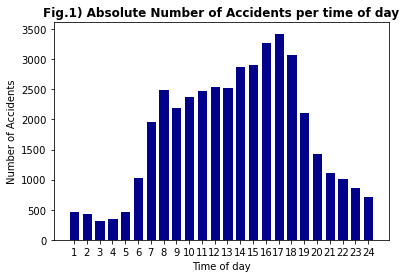

In [13]:
hourly_accs = df_accidents['AccidentHour'].value_counts().to_dict()
hourly_accs[24.0] = hourly_accs.pop(0.0)
labels = [int(key) for key, value in hourly_accs.items()]

#create barplot of distribution
plt.title('Fig.1) Absolute Number of Accidents per time of day', fontweight = 'bold')
plt.bar(hourly_accs.keys(), hourly_accs.values(), color='darkblue', edgecolor='white', label='Mean', 
       tick_label = labels)
plt.ylabel('Number of Accidents')
plt.xlabel('Time of day')
plt.show()

In [14]:
#count number of monthly accidents per year
dict_1 = {}

for j in years:
    accidents_list = []
    
    for i in months:
        row_dim = df_accidents[(df_accidents['AccidentYear'] == j) & (df_accidents['AccidentMonth'] == i)].shape[0]
        accidents_list.append(row_dim)
    dict_1['{}'.format(j)] = [i for i in accidents_list]
    
dict_1

{'2011': [274, 221, 288, 324, 360, 310, 290, 343, 332, 324, 305, 319],
 '2012': [269, 239, 340, 290, 306, 309, 307, 305, 280, 289, 322, 279],
 '2013': [242, 227, 299, 305, 332, 372, 337, 323, 299, 328, 314, 267],
 '2014': [247, 260, 321, 301, 311, 388, 294, 299, 301, 313, 252, 263],
 '2015': [249, 246, 298, 288, 324, 356, 550, 491, 512, 511, 519, 447],
 '2016': [450, 396, 420, 514, 549, 554, 478, 504, 546, 515, 480, 412],
 '2017': [411, 398, 543, 457, 547, 536, 495, 506, 476, 494, 518, 466],
 '2018': [398, 331, 522, 533, 531, 578, 571, 525, 489, 542, 527, 460],
 '2019': [400, 414, 473, 468, 496, 591, 545, 508, 510, 520, 510, 412]}

#### Average number of monthly accidents:

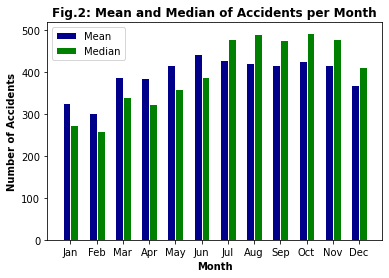

In [15]:
monthly_avgs_dict = {}

for j in range(12):
    
    month_list = []
    
    for key, value in dict_1.items():
        month_list.append(value[j]) #stores the number of accidents of the same month for every year
    months_name = calendar.month_name[j+1]
    monthly_avgs_dict[months_name[:3]] = [np.mean(month_list), np.median(month_list)] #stores the average number of accidents for each month


# set heights of bars
bars1 = [value[0] for key, value in monthly_avgs_dict.items()]
bars2 = [value[1] for key, value in monthly_avgs_dict.items()]
 
barWidth = 0.3

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, width=barWidth, color='darkblue', edgecolor='white', label='Mean')
plt.bar(r2, bars2, width=barWidth, color='green', edgecolor='white', label='Median')

plt.title('Fig.2: Mean and Median of Accidents per Month', fontweight = 'bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of Accidents', fontweight='bold')
plt.xticks([r + (barWidth-0.15) for r in range(len(bars1))], list(monthly_avgs_dict.keys()))


# Create legend & Show graphic
plt.legend()
plt.show()

#### Average number of yearly accidents:

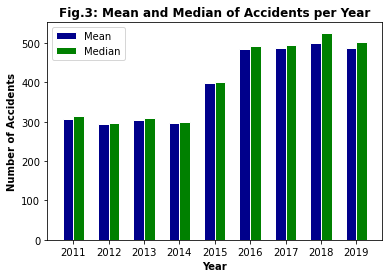

In [16]:
yearly_avgs_dict = {}

for key, value in dict_1.items():
    yearly_avgs_dict[key] = [np.mean(value), np.median(value)] #stores the average number of accidents per year
    

# set heights of bars
bars1 = [value[0] for key, value in yearly_avgs_dict.items()]
bars2 = [value[1] for key, value in yearly_avgs_dict.items()]
 
barWidth = 0.3

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, width=barWidth, color='darkblue', edgecolor='white', label='Mean')
plt.bar(r2, bars2, width=barWidth, color='green', edgecolor='white', label='Median')

plt.title('Fig.3: Mean and Median of Accidents per Year', fontweight = 'bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Accidents', fontweight='bold')
plt.xticks([r + (barWidth-0.15) for r in range(len(bars1))], list(yearly_avgs_dict.keys()))


# Create legend & Show graphic
plt.legend()
plt.show()

**Number of accidents per location:**

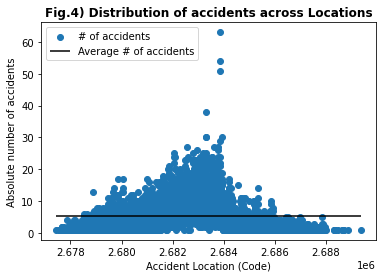

In [17]:
import matplotlib.pyplot as plt
location_dict = df_accidents['AccidentLocation_CHLV95_E'].value_counts().to_dict()
plt.title('Fig.4) Distribution of accidents across Locations', fontweight = 'bold')
plt.scatter(location_dict.keys(), location_dict.values(), label = '# of accidents')
plt.ylabel('Absolute number of accidents')
plt.xlabel('Accident Location (Code)')
plt.hlines(np.mean(list(location_dict.values())), min(list(location_dict.keys())), 
           max(list(location_dict.keys())), color = 'black', label = 'Average # of accidents')
plt.legend(loc = 'best')

- Count days in every year's month... This is needed to check whether we have data for every day of each year in order to pin down the exact date:


In [18]:
from itertools import groupby

#count number of distinct days in each month for every year:
for j in years:
    
    days_per_month = []
    
    for i in months:
        z = pd.Series(zip([[len([v]), k] for k, v in groupby(df_accidents[(df_accidents['AccidentYear'] == j) & (df_accidents['AccidentMonth'] == i)]['AccidentWeekDay'])]))
        item_counts = z.index.value_counts(normalize=False)
        days_per_month.append(item_counts.sum())
        
    print('{}:'.format(j), days_per_month)

2011: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2012: [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2013: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2014: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2015: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2016: [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2017: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2018: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2019: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


Safe null time values as NaN and figure out each date and save as datetime

In [19]:
first_day = 0
day_multiplier = 0
start = 0
prev_days = ('aw402', 'aw403', 'aw404', 'aw405', 'aw406', 'aw407')

for i, row in df_accidents.iterrows():
    
    # Set the reducer variable according to which day the current month starts with
    # This is done so that in the if, elif loops below to get the correct day for
    # every month
    
    reducer = datetime.date(row['AccidentYear'], row['AccidentMonth'], 1).weekday()
    
    # increase the day multiplier if the a "higher" Weekday is followed by a "lower" weekday
    # example Saturday is followed by a thursday, in this case it is inferred that the next 
    # week has started
    
    if start > 0:
        if int(df_accidents.at[i-1, 'AccidentWeekDay'][-1]) > int(df_accidents.at[i, 'AccidentWeekDay'][-1]):
            day_multiplier += 1
            
        # reset the day_multiplier if a new month starts
        
        if df_accidents.at[i-1, 'AccidentMonth'] != df_accidents.at[i, 'AccidentMonth']:
            day_multiplier = 0
        
        
    
    if row['AccidentWeekDay'] == 'aw401':
        df_accidents.at[i, 'day'] = 1 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw402':
        df_accidents.at[i, 'day'] = 2 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw403':
        df_accidents.at[i, 'day'] = 3 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw404':
        df_accidents.at[i, 'day'] = 4 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw405':
        df_accidents.at[i, 'day'] = 5 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw406':
        df_accidents.at[i, 'day'] = 6 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw407':
        df_accidents.at[i, 'day'] = 7 + 7 * day_multiplier - reducer
    
    # safe null values in Accident hour as 'nan' in date column
    if math.isnan(df_accidents.at[i, 'AccidentHour']):
        accident_date = df_accidents.at[i, 'AccidentHour']
        print(df_accidents.at[i, 'AccidentHour'])
        
    # convert to datetime format all time with :30
    else:
        accident_date = datetime.datetime(row['AccidentYear'], row['AccidentMonth'], int(df_accidents.at[i, 'day']), int(df_accidents.at[i, 'AccidentHour']), 30)

    df_accidents.at[i, 'date'] = accident_date
    
    start = 1

nan
nan
nan
nan


In [20]:
#drop columns in accidents dataframe that are not necessary
df_accidents = df_accidents.drop(['AccidentUID', 'day', 'AccidentHour_text', 'AccidentWeekDay', 'AccidentYear'], axis = 1)
df_accidents = df_accidents.drop(['AccidentType_en', 'AccidentSeverityCategory_en', 'RoadType_en', 'AccidentSeverityCategory_en',
                                 'CantonCode', 'MunicipalityCode', 'AccidentMonth_en'], axis = 1)

In [21]:
#Convert boolean cols to boolean values:
df_accidents['AccidentInvolvingPedestrian'] = 1*df_accidents['AccidentInvolvingPedestrian'].values
df_accidents['AccidentInvolvingBicycle'] = 1*df_accidents['AccidentInvolvingBicycle'].values
df_accidents['AccidentInvolvingMotorcycle'] = 1*df_accidents['AccidentInvolvingMotorcycle'].values

In [22]:
#move date column in accidents df to first position
first_column = df_accidents.pop('date')
df_accidents.insert(0, 'date', first_column)

#### Rename columns of month, hour and weekday for merge later

In [23]:
month_columns = [df_accidents[column].name for column in df_accidents if df_accidents[column].name.startswith('AccidentMonth')]
hour_columns = [df_accidents[column].name for column in df_accidents if df_accidents[column].name.startswith('AccidentHour')]

for i in month_columns:
    df_accidents.rename({i: i[8:]}, axis = 1, inplace= True)
    
for i in hour_columns:
    df_accidents.rename({i: i[8:]}, axis = 1, inplace = True)
    
    
df_accidents.rename({'AccidentWeekDay_en': 'WeekDay'}, axis = 1, inplace = True)

df_accidents.columns

Index(['date', 'AccidentType', 'AccidentSeverityCategory',
       'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType', 'AccidentLocation_CHLV95_E',
       'AccidentLocation_CHLV95_N', 'Month', 'WeekDay', 'Hour'],
      dtype='object')

In [24]:
df_accidents.head()

,date,AccidentType,AccidentSeverityCategory,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,Month,WeekDay,Hour
0,2011-01-01 00:30:00,at0,as4,0,0,0,rt433,2684605,1245194,1,Saturday,0.0
1,2011-01-01 01:30:00,at0,as3,0,1,0,rt433,2682382,1246980,1,Saturday,1.0
2,2011-01-01 02:30:00,at0,as4,0,0,0,rt439,2682791,1247749,1,Saturday,2.0
3,2011-01-01 02:30:00,at5,as3,0,0,0,rt433,2681199,1247102,1,Saturday,2.0
4,2011-01-01 03:30:00,at0,as4,0,0,0,rt433,2682479,1250690,1,Saturday,3.0


In [ ]:
#Check for NaNs:
df_accidents.isnull().any()

In [30]:
df_accidents[df_accidents['date'].isnull()]

,date,AccidentType,AccidentSeverityCategory,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,Month,WeekDay,Hour
3149,NaT,at0,as4,0,0,0,rt430,2681888,1246482,11,Monday,NaN
5749,NaT,at0,as4,0,0,0,rt430,2679335,1249796,7,Tuesday,NaN
7436,NaT,at0,as4,0,0,0,rt431,2683660,1250338,1,Monday,NaN
8193,NaT,at0,as4,0,0,0,rt430,2684363,1250915,4,Friday,NaN


In [33]:
#drop NaNs:
df_accidents = df_accidents.dropna()
df_accidents

,date,AccidentType,AccidentSeverityCategory,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,Month,WeekDay,Hour
0,2011-01-01 00:30:00,at0,as4,0,0,0,rt433,2684605,1245194,1,Saturday,0.0
1,2011-01-01 01:30:00,at0,as3,0,1,0,rt433,2682382,1246980,1,Saturday,1.0
2,2011-01-01 02:30:00,at0,as4,0,0,0,rt439,2682791,1247749,1,Saturday,2.0
3,2011-01-01 02:30:00,at5,as3,0,0,0,rt433,2681199,1247102,1,Saturday,2.0
4,2011-01-01 03:30:00,at0,as4,0,0,0,rt433,2682479,1250690,1,Saturday,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42725,2019-12-31 12:30:00,at0,as4,0,1,1,rt433,2683523,1247624,12,Tuesday,12.0
42726,2019-12-31 18:30:00,at5,as3,0,1,0,rt433,2681573,1247700,12,Tuesday,18.0
42727,2019-12-31 18:30:00,at1,as4,0,0,0,rt432,2682276,1247052,12,Tuesday,18.0
42728,2019-12-31 19:30:00,at7,as4,0,0,0,rt433,2683004,1247184,12,Tuesday,19.0


In [34]:
df_accidents.to_pickle("datasets\Accidents.pkl")